# The TwoWay Analysis of Variance (ANOVA)

Two-way ANOVA test is used to evaluate simultaneously the effect of two grouping variables (A and B) on a response variable.

http://personality-project.org/r/r.guide/r.anova.html

http://www.sthda.com/english/wiki/two-way-anova-test-in-r#what-is-two-way-anova-test

In [100]:
library(ggplot2)
library(car)
library(MASS)

In [54]:
options(repr.plot.width = 6, repr.plot.height = 5)

In [45]:
birthweight <- birthwt

head(birthweight)

,low,age,lwt,race,smoke,ptl,ht,ui,ftv,bwt
85,0,19,182,2,0,0,0,1,0,2523
86,0,33,155,3,0,0,0,0,3,2551
87,0,20,105,1,1,0,0,0,1,2557
88,0,21,108,1,1,0,0,1,2,2594
89,0,18,107,1,1,0,0,1,0,2600
91,0,21,124,3,0,0,0,0,0,2622


In [46]:
colnames(birthweight) <- c("birthwt.below.2500", 
                           "mother.age",
                           "mother.weight",
                           "ethnicity",
                           "mother.smokes",
                           "previous.prem",
                           "hypertension",
                           "uterine.irr",
                           "physician.visits",
                           "birthwt.grams")

In [47]:
head(birthweight)

,birthwt.below.2500,mother.age,mother.weight,ethnicity,mother.smokes,previous.prem,hypertension,uterine.irr,physician.visits,birthwt.grams
85,0,19,182,2,0,0,0,1,0,2523
86,0,33,155,3,0,0,0,0,3,2551
87,0,20,105,1,1,0,0,0,1,2557
88,0,21,108,1,1,0,0,1,2,2594
89,0,18,107,1,1,0,0,1,0,2600
91,0,21,124,3,0,0,0,0,0,2622


In [48]:
dim(birthweight)

[1] 189  10

In [51]:
birthweight <- birthweight[, c('mother.smokes', 'ethnicity', 
                               'hypertension', 'physician.visits', 'birthwt.grams')]

head(birthweight)

,mother.smokes,ethnicity,hypertension,physician.visits,birthwt.grams
85,0,2,0,0,2523
86,0,3,0,3,2551
87,1,1,0,1,2557
88,1,1,0,2,2594
89,1,1,0,0,2600
91,0,3,0,0,2622


In [52]:
colSums(is.na(birthweight))

mother.smokes        ethnicity     hypertension physician.visits 
               0                0                0                0 
   birthwt.grams 
               0

In [53]:
dim(birthweight)

[1] 189   5

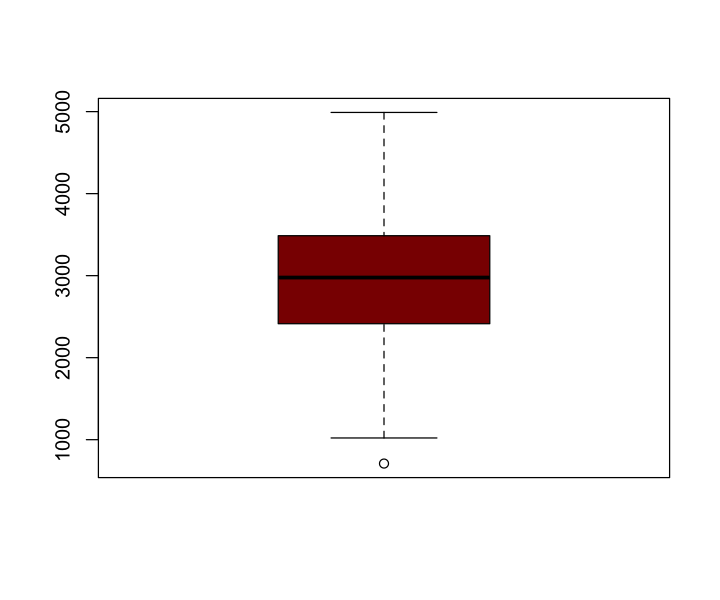

In [55]:
boxplot(birthweight$birthwt.grams, col='darkred')

In [56]:
str(birthweight)

'data.frame':	189 obs. of  5 variables:
 $ mother.smokes   : int  0 0 1 1 1 0 0 0 1 1 ...
 $ ethnicity       : int  2 3 1 1 1 3 1 3 1 1 ...
 $ hypertension    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ physician.visits: int  0 3 1 2 0 0 1 1 1 0 ...
 $ birthwt.grams   : int  2523 2551 2557 2594 2600 2622 2637 2637 2663 2665 ...


### Check unique values of features

In [57]:
table(birthweight$mother.smokes)


  0   1 
115  74 

In [58]:
table(birthweight$physician.visits)


  0   1   2   3   4   6 
100  47  30   7   4   1 

In [59]:
table(birthweight$ethnicity)


 1  2  3 
96 26 67 

### Barplot

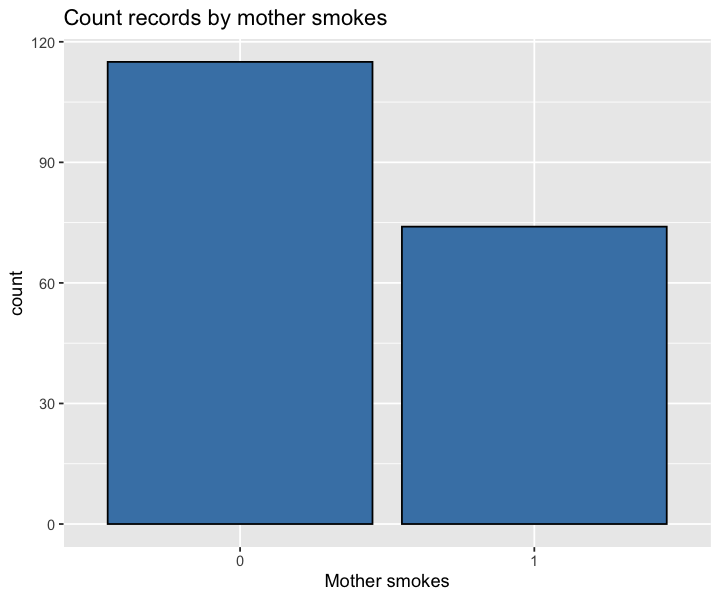

In [60]:
ggplot(data = birthweight, 
       aes(factor(x = mother.smokes))) + 
       geom_bar(col = 'black', fill = 'steelblue') +
       ggtitle('Count records by mother smokes') +
       xlab('Mother smokes') +
       ylab('count')

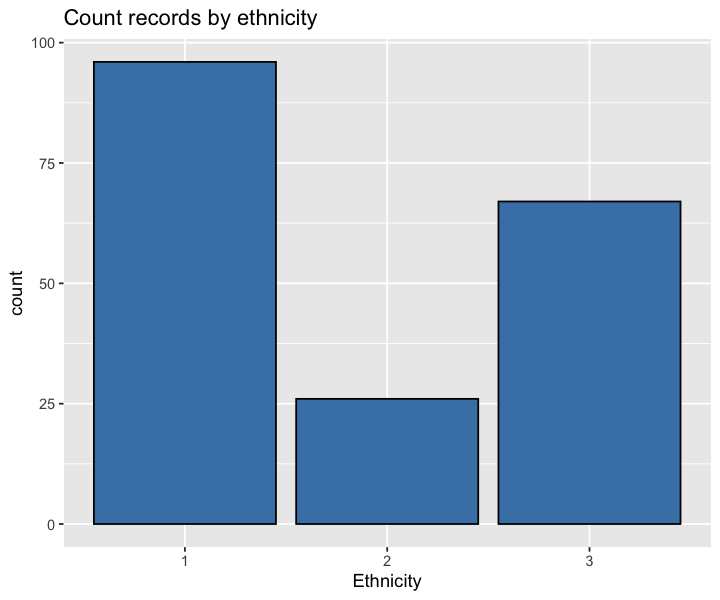

In [62]:
ggplot(data = birthweight, 
       aes(factor(x = ethnicity))) + 
       geom_bar(col = 'black', fill = 'steelblue') +
       ggtitle('Count records by ethnicity')+
       xlab('Ethnicity') +
       ylab('count')

### Summary of Votes

In [65]:
summary(birthweight$birthwt.grams)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    709    2414    2977    2945    3487    4990 

### Density curve

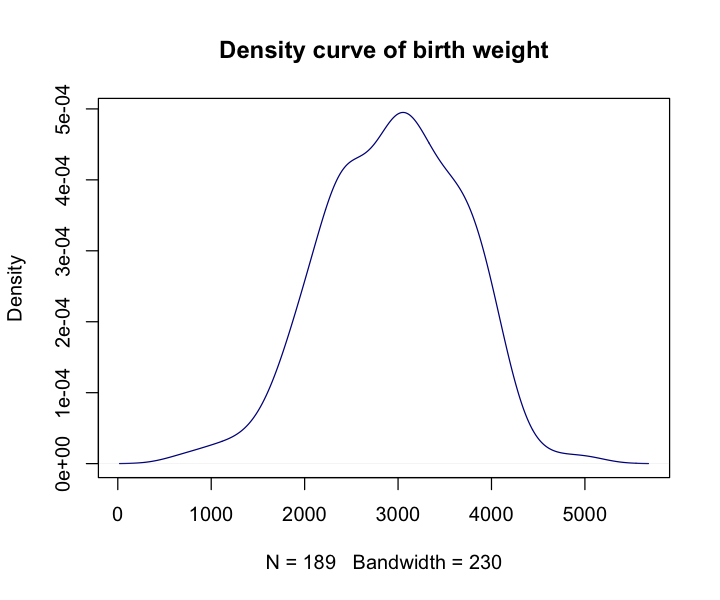

In [67]:
plot(density(birthweight$birthwt.grams), col = 'darkblue', 
     main = 'Density curve of birth weight')

### Boxplot 

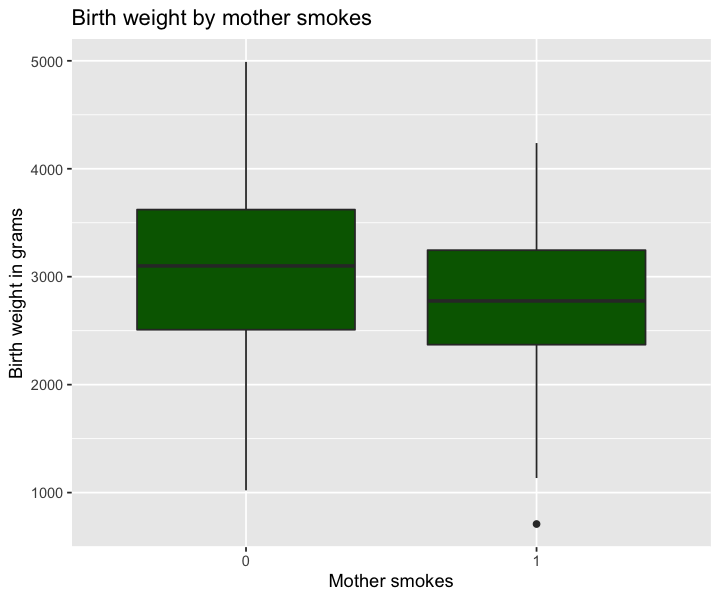

In [69]:
qplot(factor(x = mother.smokes), y = birthwt.grams,
      geom = 'boxplot',
      main = 'Birth weight by mother smokes',  
      data = birthweight,
      xlab = 'Mother smokes',
      ylab = 'Birth weight in grams',
      fill = I('darkgreen')
)

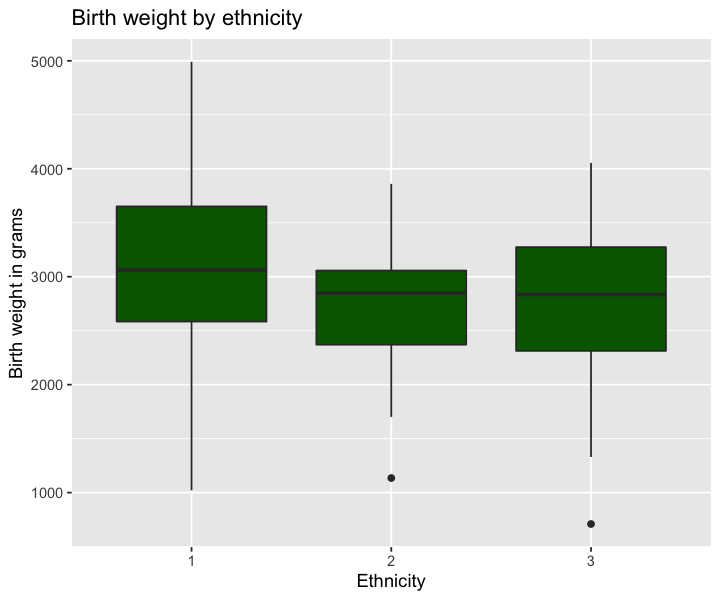

In [70]:
qplot(factor(x = ethnicity), y = birthwt.grams,
      geom = 'boxplot',
      main = 'Birth weight by ethnicity',  
      data = birthweight,
      xlab = 'Ethnicity',
      ylab = 'Birth weight in grams',
      fill = I('darkgreen')
)

### Boxplot of factors and Votes

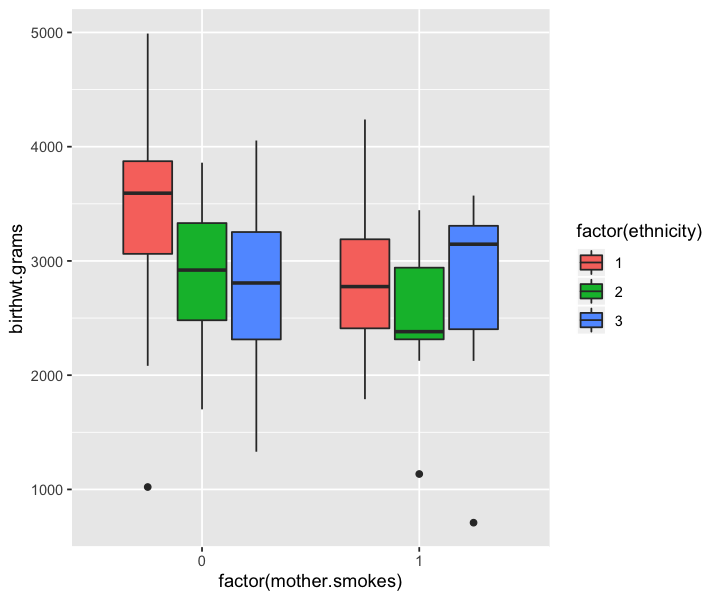

In [75]:
ggplot(data = birthweight, 
       aes(x = factor(mother.smokes), y = birthwt.grams)) + geom_boxplot(aes(fill = factor(ethnicity)))

## Compute TwoWay ANOVA

__Note:-__ ANOVA test with assumption of equal variances

### First way

__Note:-__ This is `additive model` i.e two factors are independent to each other. 

https://roma.stat.wisc.edu/courses/st333-larget/review.pdf

In [110]:
twoWay_anova_no_interaction <-
    aov(birthwt.grams ~ factor(mother.smokes) + factor(ethnicity), data = birthweight)

summary(twoWay_anova_no_interaction)

                       Df   Sum Sq Mean Sq F value   Pr(>F)    
factor(mother.smokes)   1  3625946 3625946   7.655 0.006237 ** 
factor(ethnicity)       2  8712354 4356177   9.196 0.000156 ***
Residuals             185 87631356  473683                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

### Second way
__Note:-__ Second and third way is `non-additive model`(i.e two factors are dependent to each other) but way of call are different and results are same.

https://roma.stat.wisc.edu/courses/st333-larget/review.pdf

In [111]:
twoWay_anova_interaction <-
    aov(birthwt.grams ~ factor(mother.smokes) * factor(ethnicity), data = birthweight)

summary(twoWay_anova_interaction)

                                         Df   Sum Sq Mean Sq F value  Pr(>F)
factor(mother.smokes)                     1  3625946 3625946   7.758 0.00591
factor(ethnicity)                         2  8712354 4356177   9.321 0.00014
factor(mother.smokes):factor(ethnicity)   2  2101808 1050904   2.249 0.10846
Residuals                               183 85529548  467375                
                                           
factor(mother.smokes)                   ** 
factor(ethnicity)                       ***
factor(mother.smokes):factor(ethnicity)    
Residuals                                  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [112]:
TukeyHSD(twoWay_anova_interaction, which = 'factor(mother.smokes)')

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = birthwt.grams ~ factor(mother.smokes) * factor(ethnicity), data = birthweight)

$`factor(mother.smokes)`
         diff       lwr       upr     p adj
1-0 -283.7767 -484.7917 -82.76178 0.0059101


In [113]:
TukeyHSD(twoWay_anova_interaction, which = 'factor(ethnicity)')

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = birthwt.grams ~ factor(mother.smokes) * factor(ethnicity), data = birthweight)

$`factor(ethnicity)`
          diff       lwr        upr     p adj
2-1 -427.59394 -784.7377  -70.45017 0.0142977
3-1 -400.32188 -657.4836 -143.16021 0.0008967
3-2   27.27206 -345.9805  400.52467 0.9837027


__In above result the first column `diff` say the difference between group.__

## Check ANOVA assumptions: test validity?

ANOVA assumes that the data are normally distributed and the variance across groups are homogeneous. We can check that with some diagnostic plots.

### LeveneTest

In [114]:
levene_test <- leveneTest(birthwt.grams ~ factor(mother.smokes) * factor(ethnicity),
                          data = birthweight)
levene_test

,Df,F value,Pr(>F)
group,5,0.3450092,0.8849734
,183,NA,NA


### Check the normality assumpttion

Normality plot of the residuals. In the plot below, the quantiles of the residuals are plotted against the quantiles of the normal distribution. A 45-degree reference line is also plotted.

The normal probability plot of residuals is used to verify the assumption that the residuals are normally distributed.

The normal probability plot of the residuals should approximately follow a straight line.

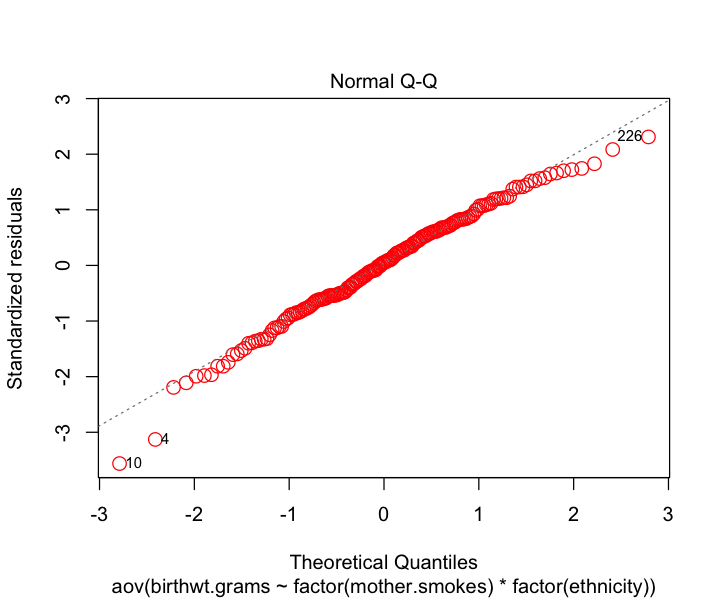

In [115]:
plot(twoWay_anova_interaction, 2, col = "red", cex = 1.5)

### Shapiro-Wilk normality test

In [116]:
aov_residuals <- residuals(object = twoWay_anova_interaction)

shapiro.test(x = aov_residuals)


	Shapiro-Wilk normality test

data:  aov_residuals
W = 0.98836, p-value = 0.1246


### Unbalanced ANOVA
* ANOVA test with assumption of not equal variances for twoway ANOVA

http://www.sthda.com/english/wiki/two-way-anova-test-in-r#compute-two-way-anova-test-in-r-for-unbalanced-designs

https://stats.stackexchange.com/questions/258341/unbalanced-two-way-anova-in-r-studio

### Compute two-way ANOVA test in R for unbalanced designs

__Note:- To solve unbalanced designs, you have to install `car` package by the help command `conda install -c r r-car` in your terminal.__

https://docs.anaconda.com/anaconda/packages/r-language-pkg-docs/#c-packages

In [117]:
Anova(twoWay_anova_interaction, type = 'III')

,Sum Sq,Df,F value,Pr(>F)
(Intercept),517278369,1,1106.774718,1.604050e-79
factor(mother.smokes),8634536,1,18.474553,2.794476e-05
factor(ethnicity),9936861,2,10.630510,4.288463e-05
factor(mother.smokes):factor(ethnicity),2101808,2,2.248526,1.084634e-01
Residuals,85529548,183,NA,NA
